In [1]:
from Environment_Up import Environment

In [2]:
fname = "goodTraces.txt"
env = Environment(fname, 3)
dataset = env.parsing_file()
print(len(dataset))

0
Parsing Data
Merge Data
State Data
1
Parsing Data
Merge Data
State Data
2
Parsing Data
Merge Data
State Data
3
Parsing Data
Merge Data
State Data
4
Parsing Data
Merge Data
State Data
5
Parsing Data
Merge Data
State Data
6
Parsing Data
Merge Data
State Data
7
Parsing Data
Merge Data
State Data
8
Parsing Data
Merge Data
State Data
9
Parsing Data
Merge Data
State Data
10
Parsing Data
Merge Data
State Data
11
Parsing Data
Merge Data
State Data
12
Parsing Data
Merge Data
State Data
13
Parsing Data
Merge Data
State Data
14
Parsing Data
Merge Data
State Data
15


In [3]:
print(len(dataset))

15


Episode 0/100: Vehicle_Losses: [11706.192412916525, 10770.469119005098, 11196.624557822246]
Episode 1/100: Vehicle_Losses: [9893.56274461677, 9725.64262255191, 9948.155236277056]
Episode 2/100: Vehicle_Losses: [10247.331398922383, 10107.867492043813, 10524.192647220789]
Episode 3/100: Vehicle_Losses: [10839.052229760839, 10778.824688549612, 10813.61524162109]
Episode 4/100: Vehicle_Losses: [5295.784253471415, 4881.596855443882, 4991.045334949773]
Episode 5/100: Vehicle_Losses: [9767.26958397697, 9956.853686523269, 10745.266999780955]
Episode 6/100: Vehicle_Losses: [8129.2306854517865, 7834.92051036208, 8303.848545858049]
Episode 7/100: Vehicle_Losses: [11674.991615004239, 11986.691294441363, 11973.296848953307]
Episode 8/100: Vehicle_Losses: [4671.069576086397, 4575.433018415642, 4726.865423517484]
Episode 9/100: Vehicle_Losses: [12022.855347209295, 11644.33217688426, 12019.266104052665]
Episode 10/100: Vehicle_Losses: [11352.10858148984, 12162.58710947745, 11833.368009219568]
Episode 

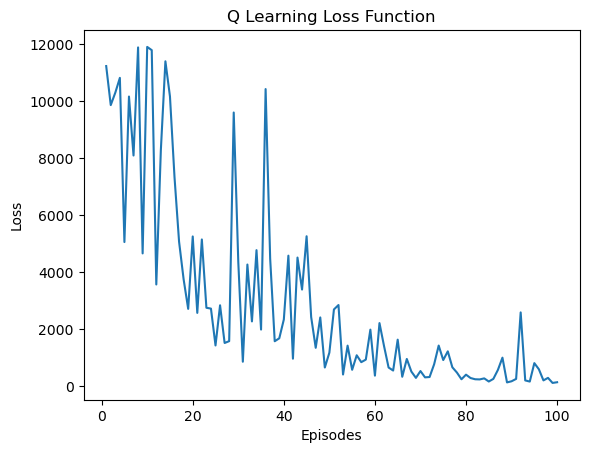

In [4]:
from DQN import QLearning

Q_Agent = QLearning(dataset, 3)
Q_Agent.train()

In [5]:
import numpy as np
import pandas as pd
# State-Max Action Reward
# Vehicle
for v in range(3):
    data = Q_Agent.q_s_a[v]
    data_list = []
    for s in data.keys():
        actions_reward = list(data[s].values())
        actions = list(data[s].keys())
        s=list(s)
        s=s[v*5:(v+1)*5]+[s[15+v]]+[s[18+v]]+[s[21+v]]
        data_list.append([s, actions[np.argmax(actions_reward)], np.max(actions_reward)])

    df = pd.DataFrame(data_list, columns=["State", "Max Action", "Reward"])
    df.head()
    df.to_csv(f"qTable.csv" , mode='a', header=False, index=False)